In [91]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
#import warnings
#warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
merged_df=pd.merge(mouse_df, clinical_df, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [92]:
## TUMOR RESPONSE TO TREATMENT
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response=merged_df.groupby(["Drug", "Timepoint"]).mean().reset_index()
# Convert to DataFrame
tumor_response_df=tumor_response[['Drug',"Timepoint","Tumor Volume (mm3)"]]
# Preview DataFrame
display(tumor_response_df.head())

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [93]:
#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem=merged_df.groupby(["Drug", "Timepoint"]).sem().reset_index()
sem_df=tumor_sem[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
error_bar=sem_df["Tumor Volume (mm3)"]

# Preview DataFrame
display(sem_df.head())

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [94]:
# Minor Data Munging to Re-Format the Data Frames
tumor_plot=tumor_response_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
display(tumor_plot)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


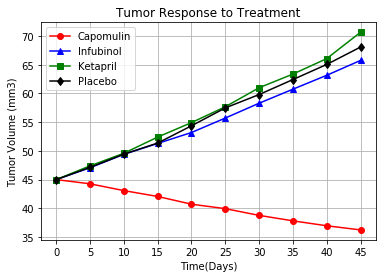

In [95]:
# Generate the Plot (with Error Bars)
y_axis1=["0","5","10","15","20", "25", "30", "35", "40", "45"]

x_capomulin=plt.plot(y_axis1,tumor_plot["Capomulin"], marker="o", color="red", label="Capomulin")
x_infubinol=plt.plot(y_axis1,tumor_plot["Infubinol"], marker="^", color="blue", label="Infubinol")
x_ketapril=plt.plot(y_axis1,tumor_plot["Ketapril"], marker="s", color="green", label="Ketapril")
x_placebo=plt.plot(y_axis1,tumor_plot["Placebo"], marker="d", color="black", label="Placebo")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(loc="upper left")

plt.show

# Save the Figure

plt.savefig("../Images/tumor_response.png")


In [96]:
##METASTATIC RESPONSE TO TREATMENT 
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_response=tumor_response[['Drug',"Timepoint","Metastatic Sites"]]
# Convert to DataFrame

# Preview DataFrame
display(meta_response.head())


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [97]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem=merged_df.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame
meta_sem_df=tumor_sem[["Drug", "Timepoint", "Metastatic Sites"]]  
# Preview DataFrame
display(meta_sem_df.head())

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [98]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_plot=meta_response.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
display(metastatic_plot)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


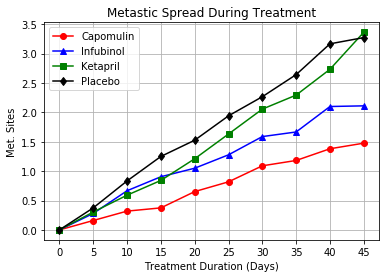

In [99]:
# Generate the Plot (with Error Bars)
y_axis1=["0","5","10","15","20", "25", "30", "35", "40", "45"]

x_capomulin2=plt.plot(y_axis1,metastatic_plot["Capomulin"], marker="o", color="red", label="Capomulin")
x_infubinol2=plt.plot(y_axis1,metastatic_plot["Infubinol"], marker="^", color="blue", label="Infubinol")
x_ketapril2=plt.plot(y_axis1,metastatic_plot["Ketapril"], marker="s", color="green", label="Ketapril")
x_placebo2=plt.plot(y_axis1,metastatic_plot["Placebo"], marker="d", color="black", label="Placebo")

plt.title("Metastic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()
plt.legend(loc="upper left")

plt.show

# Save the Figure

plt.savefig("../Images/metastic_spread.png")



In [100]:
##SURVIVAL RATES
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate=merged_df.groupby(["Drug", "Timepoint"]).count().reset_index()
# Convert to DataFrame
survival_df=survival_rate[['Drug',"Timepoint","Mouse ID"]]
survival_df["Mouse Count"]=(survival_df["Mouse ID"]/25)*100

# Preview DataFrame

display(survival_df.head())

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Drug,Timepoint,Mouse ID,Mouse Count
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0


In [101]:
# Minor Data Munging to Re-Format the Data Frames
survival_plot=survival_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
display(survival_plot)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


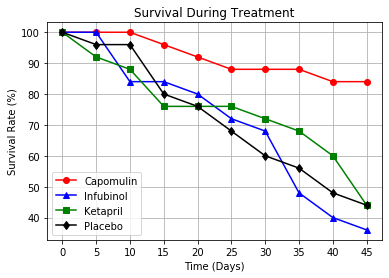

In [102]:
# Generate the Plot (with Error Bars)
y_axis1=["0","5","10","15","20", "25", "30", "35", "40", "45"]

x_capomulin3=plt.plot(y_axis1,survival_plot["Capomulin"], marker="o", color="red", label="Capomulin")
x_infubinol3=plt.plot(y_axis1,survival_plot["Infubinol"], marker="^", color="blue", label="Infubinol")
x_ketapril3=plt.plot(y_axis1,survival_plot["Ketapril"], marker="s", color="green", label="Ketapril")
x_placebo3=plt.plot(y_axis1,survival_plot["Placebo"], marker="d", color="black", label="Placebo")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend(loc="lower left")

plt.show

# Save the Figure


plt.savefig("../Images/survival_during_treatment.png")

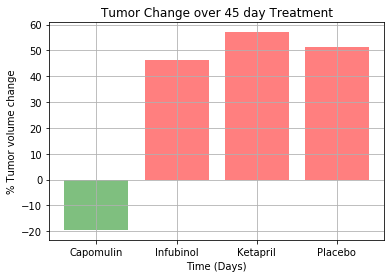

In [103]:
##SUMMARY BAR GRAPH
# Calculate the percent changes for each drug


capomulin_change=((36.236114-45)/45)*100
infubinol_change=((65.755562-45)/45)*100
ketapril_change=((70.662958-45)/45)*100
placebo_change=((68.084082-45)/45)*100

plt.bar("Capomulin", capomulin_change, color="g", alpha=0.5, align="center")
plt.bar("Infubinol", infubinol_change, color="r", alpha=0.5, align="center")
plt.bar("Ketapril", ketapril_change, color="r", alpha=0.5, align="center")
plt.bar("Placebo", placebo_change, color="r", alpha=0.5, align="center")

plt.title("Tumor Change over 45 day Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("% Tumor volume change")
plt.grid()


plt.show

# Save the Figure
plt.savefig("../Images/tumor_size_change.png")

In [ ]:
# OBSERVED TRENDS
# Capomulin seems to be the most effective drug to fight the tumors
#Ketapril seems like the worst drug to fight the tumor
#Placebo is actually less harmfull than the Ketapril